<h1>Linear Regression ( Student Percentage Predictions )</h1>
<ul>
 <li>Name: </li>
 <li>Class number: </li>
 <li>Assignment:01</li>
 <li>Submitted To: </li>
 <li>BSCS 6<sup>th</sup> Semester <i><b>ISLAMIA COLLEGE PESHAWER</b></i></li>   
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def scaled_feature(feature):
    max_value = max(feature)
    feature = [x/max_value for x in feature]
    return feature
    
def hypothesis(theta, X):
    return np.dot(X, theta)

def compute_cost(theta, X, y):
    m = len(y)
    predictions = hypothesis(theta, X)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost.item()

def compute_gradient(theta, X, y):
    m = len(y)
    predictions = hypothesis(theta, X)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    return gradient    
def normal_equation(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta    

In [2]:
dataset = pd.read_csv("Data-Files/RandomDataSetCreation/StudentPercentageDataset.csv")
dataset

,Study Hrs/Day,Attendence Percentage,Percentage Score
0,0,90.82,45.41
1,2,13.43,16.72
2,4,93.61,66.81
3,3,71.75,50.88
4,8,72.98,76.49
...,...,...,...
195,6,64.70,62.35
196,9,82.07,86.04
197,8,54.21,67.10
198,2,42.21,31.10


In [3]:
st_hrs = dataset["Study Hrs/Day"].tolist()
att_per = dataset["Attendence Percentage"].tolist()
per_score = dataset["Percentage Score"].tolist()
print(max(st_hrs),max(att_per))

9 99.91


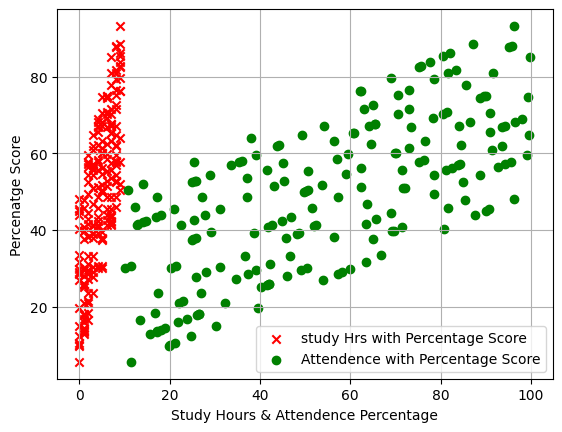

In [4]:
plt.scatter(st_hrs,per_score,c='r',marker='x',label='study Hrs with Percentage Score')
plt.scatter(att_per,per_score,c='g',marker='o',label='Attendence with Percentage Score')
plt.xlabel("Study Hours & Attendence Percentage")
plt.ylabel("Percenatge Score")
plt.grid()
plt.legend()
plt.show()

In [5]:
st_hrs = np.array(scaled_feature(st_hrs)).reshape(-1,1)
att_per = np.array(scaled_feature(att_per)).reshape(-1,1)
per_score = np.array(scaled_feature(per_score)).reshape(-1,1)
x = np.column_stack((np.ones(200),st_hrs,att_per))
print(x.shape)
y = per_score

(200, 3)


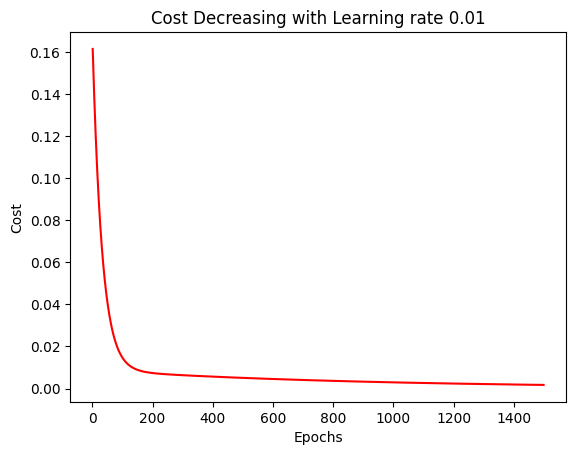

array([[0.15628721],
       [0.37523338],
       [0.36100073]])

In [6]:
theta = np.zeros((3,1))
epochs = []
costs = []
for i in range(1,1500):
    epochs.append(i)
    costs.append(compute_cost(theta,x,y))
    theta -= 0.01 * compute_gradient(theta,x,y) 
plt.plot(epochs,costs,c='r')
plt.title("Cost Decreasing with Learning rate 0.01")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
theta

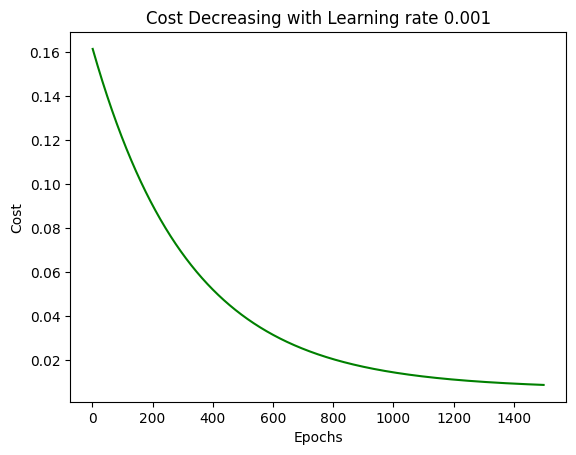

array([[0.28852054],
       [0.19485166],
       [0.20087659]])

In [7]:
theta = np.zeros((3,1))
epochs = []
costs = []
for i in range(1,1500):
    epochs.append(i)
    costs.append(compute_cost(theta,x,y))
    theta -= 0.001 * compute_gradient(theta,x,y) 
plt.plot(epochs,costs,c='g')
plt.title("Cost Decreasing with Learning rate 0.001")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
theta

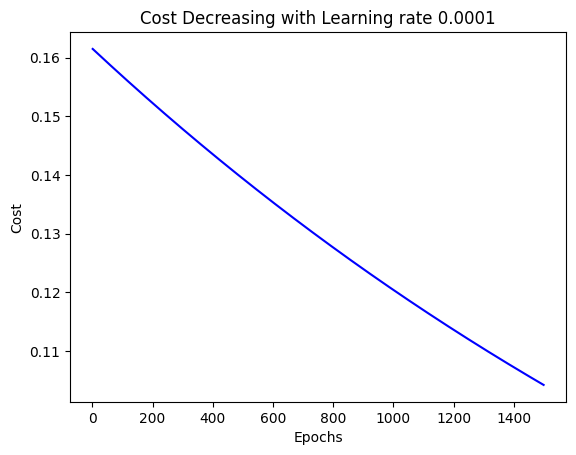

array([[0.07021682],
       [0.04124954],
       [0.04384094]])

In [8]:
theta = np.zeros((3,1))
epochs = []
costs = []
for i in range(1,1500):
    epochs.append(i)
    costs.append(compute_cost(theta,x,y))
    theta -= 0.0001 * compute_gradient(theta,x,y) 
plt.plot(epochs,costs,c='b')
plt.title("Cost Decreasing with Learning rate 0.0001")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()
theta

<h2>Implementation Using Normal Equation Below</h2>

In [9]:
def normal_equation(x, y):
    theta = np.linalg.inv(x.T @ x) @ x.T @ y
    return theta

In [10]:
theta = np.zeros((3,1))
theta

array([[0.],
       [0.],
       [0.]])

In [11]:
theta= normal_equation(x,y)

In [12]:
theta

array([[-6.36274066e-06],
       [ 4.82995812e-01],
       [ 5.36166350e-01]])

In [13]:
b = theta[0][0]
w1 = theta[1][0]
w2 = theta[2][0]
print(b,w1,w2)

-6.362740662020638e-06 0.48299581166744093 0.5361663501858851


In [14]:
def predict_student_percentage(st_hrs,att_per):
    st_hrs /= 10
    att_per /= 100
    return ((w1*st_hrs)+(w2*att_per)+b)

In [15]:
predict_student_percentage(2,13.43)*100

16.859994042279055

In [16]:
theta = np.zeros((3,1))
for i in range(1,1500):
    theta -= 0.01 * compute_gradient(theta,x,y) 

In [17]:
theta

array([[0.15628721],
       [0.37523338],
       [0.36100073]])

In [18]:
def predict_student_percentage(st_hrs,att_per):
    st_hrs /= 10
    att_per /= 100
    return ((w1*st_hrs)+(w2*att_per)+b)

In [19]:
predict_student_percentage(2,13.43)*100

16.859994042279055

In [20]:
predict_student_percentage(2,42.21)*100

32.29086160062883